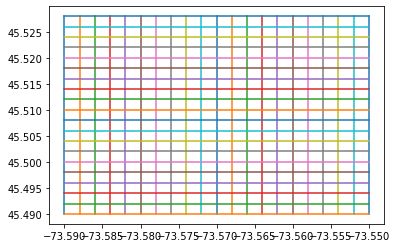

48.665789473684214


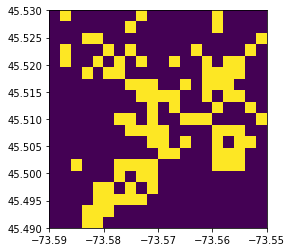

Path =
[(18, 19), (17, 18), (16, 17), (15, 16), (14, 15), (13, 14), (12, 13), (12, 12), (11, 11), (10, 11), (9, 11), (8, 12), (7, 12), (6, 11), (5, 10), (4, 9), (3, 8), (2, 7), (1, 6), (0, 5), (0, 4), (0, 3), (0, 2), (1, 1), (0, 0)]
[[0.5, 1, 0.5, 0.5, 0.5, 0.5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0.5, 0, 0, 0, 0, 0.5, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1, 0, 1, 0.5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 1, 0, 1, 0.5, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0.5, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0.5, 1, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0.5, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0.5, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0.5, 1, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0.5, 0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0.5, 1, 0, 0, 1, 0

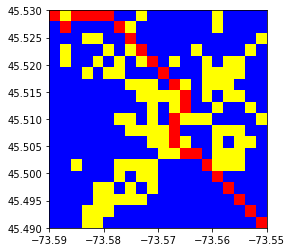

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from statistics import mean
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

def plotGrid():
    fig = plt.figure()
    ax = plt.axes()
    xs = np.arange(-73.59, -73.55, 0.002)
    #print(xs)
    ys = np.arange(45.49, 45.53, 0.002)
    #print(ys)
    lat, lon = np.meshgrid(xs,ys)
    #print(lat)
    #print(lon)
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]])
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y])
    plt.show()
    return xs, ys

def readData():
    data = gpd.read_file("C:/Users/Dora/Documents/COMP 6721/Project1/Materials/Shape/crime_dt.shp")
    geomPointList=[]
    for point in data["geometry"]:
        geomPointList.append([point.x, point.y])
    npArray = np.array(geomPointList)
    return geomPointList

def createMatrix(Matrix, geomPointList, xs, ys):
    row = 0;
    for i in range(len(ys)-1, 0, -1):
        col = 0;
        ymax = ys[i]
        ymin = ys[i-1]
        for j in range(1,len(xs)):
            xmax = xs[j]
            xmin = xs[j-1]
            #print(ymax, ymin, xmax, xmin)
            count = 0;
            for point in geomPointList:
                 if point[0] > xmin and point[0] < xmax and point[1] > ymin and point[1] < ymax:
                    count+=1;
            #print(row,col)
            Matrix[row][col] = count
            #print(col)
            col +=1
       # print("row =", row)
        row +=1
    return(Matrix)

def getMean(Matrix):
    tArray = []
    for i in range(0,19):
        for j in range(0,20):
            tArray.append(Matrix[i][j])
    return mean(tArray), tArray

def main():
    xs, ys = plotGrid()

    geomPointList = readData()
    row = len(xs)-1
    col = len(ys)-1
    Matrix = [[0 for x in range(row)] for y in range(col)]
    Matrix = createMatrix(Matrix, geomPointList, xs, ys)
    tArray =[]
    #print(Matrix)
    mean_Mat, tArray = getMean(Matrix)
    print(mean_Mat)
    #print(tArray)
    sortedArray = tArray
    sortedArray.sort()
    #print(sortedArray)
    threshold = 75
    index = len(sortedArray) * (threshold/100)
    pos = int(index)
    #print(sortedArray[pos])

    maze = [[0 for x in range(row)] for y in range(col)]

    for i in range(0,19):
        for j in range(0,20):
            if Matrix[i][j] >= sortedArray[pos]:
                maze[i][j] = 1
            else:
                maze[i][j] = 0
    #print(maze)
    fig = plt.figure()
    ax = plt.axes()
    ax.imshow(maze, extent=[-73.59, -73.55, 45.49, 45.53])
    plt.show()
    
   # maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    start = (18, 19)
    end = (0, 0)

    path = astar(maze, start, end)
    print("Path =")
    print(path)
    for point in path:
        maze[point[0]][point[1]] = 0.5
    print(maze)
    colors = 'blue red yellow'.split()
    cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)
    fig = plt.figure()
    ax = plt.axes()
    ax.imshow(maze, extent=[-73.59, -73.55, 45.49, 45.53], cmap=cmap)
    plt.show()

if __name__ == '__main__':
    main()
